In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [3]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [4]:
import os
import cv2
from PIL import Image

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
image_width = 64
image_height = 64

parasitized_img = os.listdir('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/Parasitized/')
uninfected_img = os.listdir('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/Uninfected/')
print("Number of parasitized Image:",len(parasitized_img))
print("Number of uninfected Image:", len(uninfected_img))

Number of parasitized Image: 13780
Number of uninfected Image: 13780


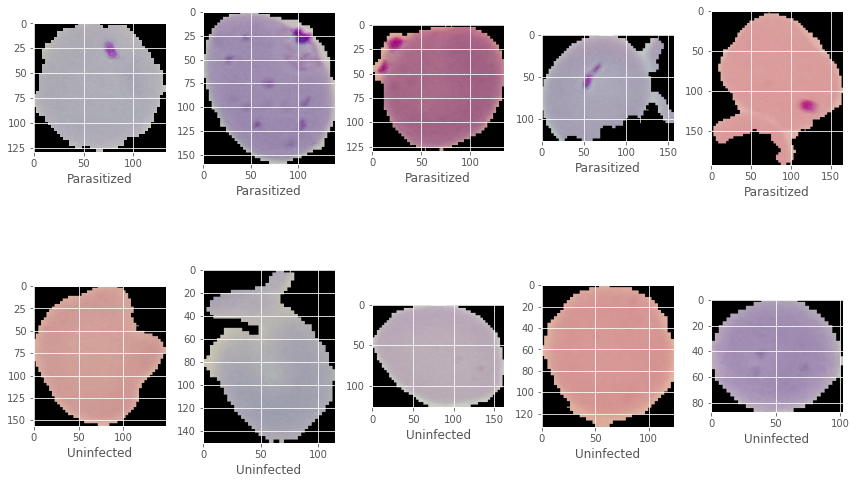

In [7]:
import random
from tensorflow.keras.preprocessing.image import load_img
list1 = ['E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/Parasitized/'
,  'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/Uninfected/']

fig = plt.figure(figsize=(12, 8))
#fig.set_size_inches(,13)
plt.style.use("ggplot")
j=1
for i in list1: 
    for k in range(5):

        filenames  = os.listdir(i)
        sample = random.choice(filenames)
        image = load_img(i+sample) #'../input/10-monkey-species/training/training/n1'
        plt.subplot(2,5,j)
        plt.imshow(image)
        plt.xlabel(i.split("/")[-2])
        j+=1
plt.tight_layout()

In [8]:
datagen = ImageDataGenerator(rescale=1/255.0,
                            shear_range = 0.2,
                            horizontal_flip = True,
                            zoom_range = 0.2,
                            validation_split=0.2)

train_data_generator = datagen.flow_from_directory(directory = 'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/',
                                                   target_size=(image_width,image_height),
                                                   class_mode = 'categorical',
                                                   batch_size=64,
                                                   subset='training'
                                                  )

Found 22048 images belonging to 2 classes.


train_data_generator.class_indices

validation_data_generator = datagen.flow_from_directory('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/',
                                            target_size = (image_width, image_height),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                            subset='validation')

In [11]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))


classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))


classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

In [13]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = classifier.fit_generator(generator=train_data_generator,
                                   steps_per_epoch=len(train_data_generator),
                                   epochs=10,
                                   validation_data=validation_data_generator,
                                   validation_steps=len(validation_data_generator),
                                   verbose=2)

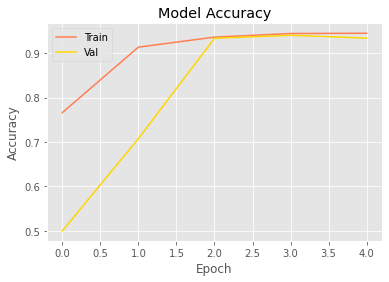

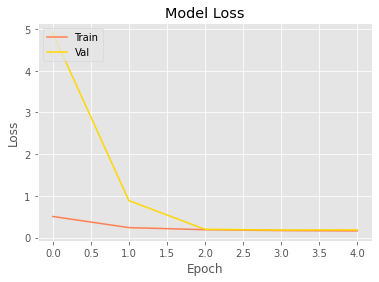

In [22]:
plt.plot(history.history['accuracy'],'coral')
plt.plot(history.history['val_accuracy'],'gold')
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'],'coral')
plt.plot(history.history['val_loss'],'gold')
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

classifier.save('custom_cnn.h5')